## Check manually measured grains

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.read_csv(r'./structs.csv')
print(df.head())
print(df['S1'])

   S1  S2  S3  S4  S5  S6  S7
0  10  11  12  35  23  36  16
1  15  10  16  17  14  41  14
2   4  19  10  25  14  23  24
3  34   6   8   8  19  13  24
4  18  10   7  14   4  14  23
0      10
1      15
2       4
3      34
4      18
       ..
995    13
996    35
997     5
998    15
999     6
Name: S1, Length: 1000, dtype: int64


In [4]:
data = df['S1'].tolist()

st.describe(data)

DescribeResult(nobs=1000, minmax=(1, 49), mean=12.986, variance=53.74955355355356, skewness=0.982179597461978, kurtosis=1.1581349764923772)

In [5]:

def get_best_distribution(data):
    dist_names = ["norm", "lognorm", "alpha", "gamma", "beta", "expon", "exponnorm", "f", "erlang", "t", "weibull_min", "weibull_max"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

best_dist, best_p, best_params = get_best_distribution(data)

p value for norm = 1.4664847078609927e-08
p value for lognorm = 0.010725750352746245


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2781: RuntimeWarning: invalid value encountered in multiply
  Lhat = muhat - Shat*mu
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:707: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


p value for alpha = 0.00144096377720957
p value for gamma = 0.032939027113757846
p value for beta = 0.036796836711255
p value for expon = 1.0565446971432071e-40
p value for exponnorm = 0.0007311515409689277
p value for f = 0.032937259910104655
p value for erlang = 0.032948863954365026


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.2.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.866666666666667.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.966666666666667.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: Runtime

p value for t = 2.2988929260155143e-06
p value for weibull_min = 1.395617417e-315
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.036796836711255
Parameters for the best fit: (2.622853600586515, 24.673533603862985, 0.2862193856528662, 132.17016356551756)


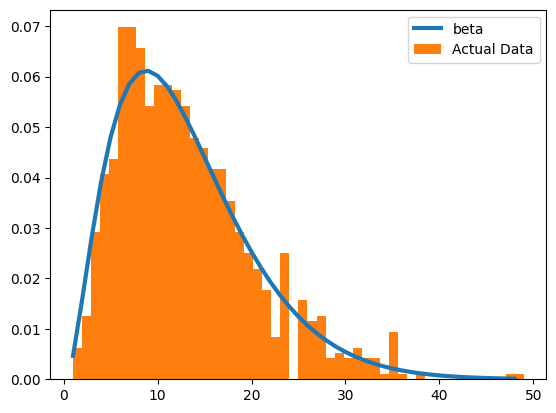

In [6]:
def show_best_fit(data, best_dist, best_params):
    npdata = np.array(data)
    xs = np.arange(npdata.min(), npdata.max(), 1)
    bins = npdata.max() + 1

    dist = getattr(st, best_dist)
    fit = dist.pdf(xs, *best_params)
    plt.plot(xs, fit, label=best_dist, lw=3)
    plt.hist(data, bins, density=True, label='Actual Data')
    plt.legend()
    plt.show()

show_best_fit(data, best_dist, best_params)

S1
DescribeResult(nobs=1000, minmax=(1, 49), mean=12.986, variance=53.74955355355356, skewness=0.982179597461978, kurtosis=1.1581349764923772)
p value for norm = 1.4664847078609927e-08
p value for lognorm = 0.010725750352746245
p value for alpha = 0.00144096377720957
p value for gamma = 0.032939027113757846
p value for beta = 0.036796836711255
p value for expon = 1.0565446971432071e-40
p value for exponnorm = 0.0007311515409689277
p value for f = 0.032937259910104655
p value for erlang = 0.032948863954365026
p value for t = 2.2988929260155143e-06
p value for weibull_min = 1.395617417e-315
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.036796836711255
Parameters for the best fit: (2.622853600586515, 24.673533603862985, 0.2862193856528662, 132.17016356551756)


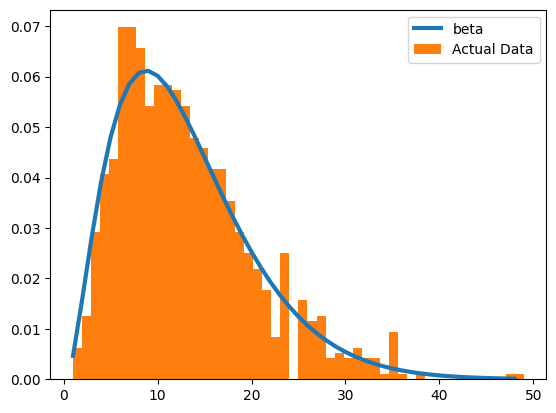

S2
DescribeResult(nobs=1000, minmax=(1, 36), mean=9.619, variance=26.17201101101101, skewness=0.9336044397374288, kurtosis=1.0056293685422153)
p value for norm = 1.9882550515190954e-11
p value for lognorm = 0.0019916255883092784
p value for alpha = 2.0144808557839858e-26
p value for gamma = 0.006872010213555684
p value for beta = 0.009102682363953108
p value for expon = 4.160895828328197e-47
p value for exponnorm = 0.000509468591280877
p value for f = 0.006922761173550393
p value for erlang = 0.006878611441834518


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.8944444444444444.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.962962962962963.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.965740740740741.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.082716049382716.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_conti

p value for t = 3.7635830586494e-08
p value for weibull_min = 8.453478303470256e-192
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.009102682363953108
Parameters for the best fit: (3.0418200913269366, 30.715554848003137, 0.1387325434683794, 105.2108908041941)


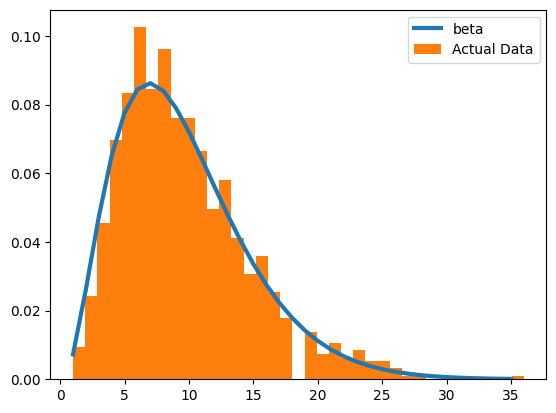

S3
DescribeResult(nobs=1000, minmax=(1, 35), mean=11.13, variance=39.27837837837839, skewness=0.7786575182914618, kurtosis=0.3743412524692684)
p value for norm = 2.9333314892075288e-09
p value for lognorm = 0.013186825619930773
p value for alpha = 0.003818489474926415
p value for gamma = 0.020891322223558495
p value for beta = 0.08088918199831863
p value for expon = 1.597196915261808e-33
p value for exponnorm = 0.0002688304279256393
p value for f = 0.020928127631871567
p value for erlang = 0.020892873676066164


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.300000000000001.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.699999999999999.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.799999999999999.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.949999999999999.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_contin

p value for t = 1.666892965243272e-07
p value for weibull_min = 4.78187246e-316
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.08088918199831863
Parameters for the best fit: (1.9588229121236584, 6.7822127397691965, 0.5888676067594059, 47.028542115714934)


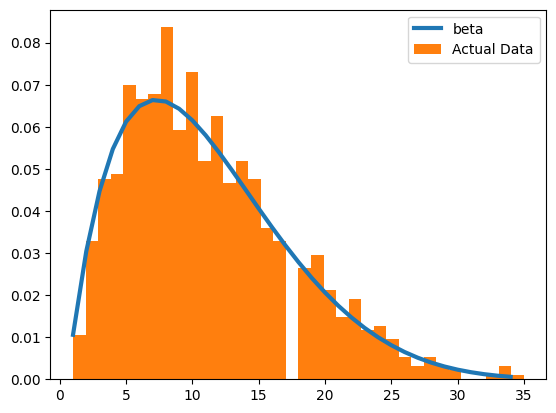

S4
DescribeResult(nobs=1000, minmax=(1, 46), mean=18.478, variance=67.9895055055055, skewness=0.37317226658760255, kurtosis=-0.41686684905213633)
p value for norm = 0.0010763194642381135
p value for lognorm = 0.0266625026942392
p value for alpha = 0.00929674024046428
p value for gamma = 0.032188051162729714
p value for beta = 0.2711077053138937
p value for expon = 9.268541718382804e-56
p value for exponnorm = 0.0071741935241631935
p value for f = 0.03225404982479563
p value for erlang = 0.032187258046379785


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 29.400000000000002.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 26.599999999999998.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.066666666666663.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 27.766666666666666.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_co

p value for t = 0.0010731776333110477
p value for weibull_min = 0.0
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.2711077053138937
Parameters for the best fit: (2.7804444966753383, 5.17579602905241, 0.466490894896498, 51.55333069443517)


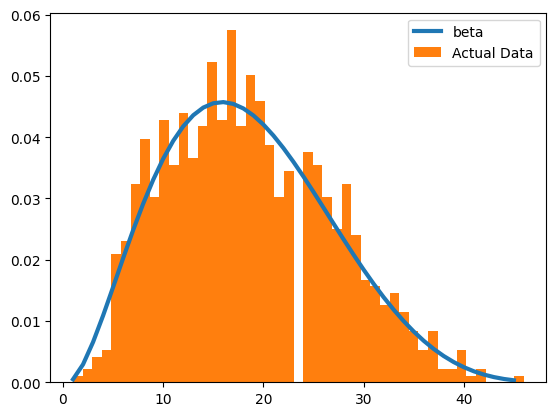

S5
DescribeResult(nobs=1000, minmax=(1, 46), mean=16.063, variance=59.802833833833844, skewness=0.4878286562309996, kurtosis=-0.00010656624204052889)
p value for norm = 0.0016351429984034173
p value for lognorm = 0.004038322731020717
p value for alpha = 3.125369020710793e-35
p value for gamma = 0.0022829010966146125
p value for beta = 0.031173009300295873
p value for expon = 1.1128414885546003e-47
p value for exponnorm = 0.004038001212698971
p value for f = 0.0022332523534885126


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 16.8.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.2.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.466666666666669.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 15.866666666666667.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: Run

p value for erlang = 0.002282899878416394
p value for t = 0.00163527330363436
p value for weibull_min = 0.0
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.031173009300295873
Parameters for the best fit: (2.6021995100748088, 6.5765354693018745, 0.41086641366321164, 55.15538614271924)


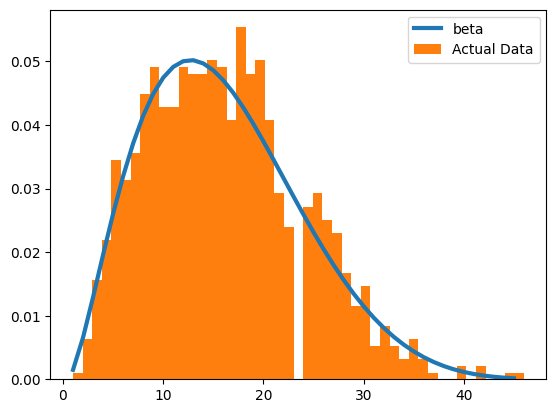

S6
DescribeResult(nobs=1000, minmax=(2, 64), mean=17.485, variance=80.98676176176176, skewness=1.0196071529850896, kurtosis=1.8013779703689714)
p value for norm = 6.07077520012386e-08
p value for lognorm = 0.08819451964272074
p value for alpha = 0.032261405798714726
p value for gamma = 0.13002677913769645


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p value for beta = 0.1300323921858021
p value for expon = 9.444024313334726e-45
p value for exponnorm = 0.010123212473336123
p value for f = 0.12987772103335404
p value for erlang = 0.13003194706530152


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1500000000000004.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 3.1000000000000005.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.916666666666667.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 2.8000000000000007.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_con

p value for t = 5.542850182398605e-05
p value for weibull_min = 0.0
p value for weibull_max = 0.0
Best fitting distribution: beta
Best p value: 0.1300323921858021
Parameters for the best fit: (3.8409545249287183, 83968499.78752092, -0.246617009675416, 387637333.2685574)


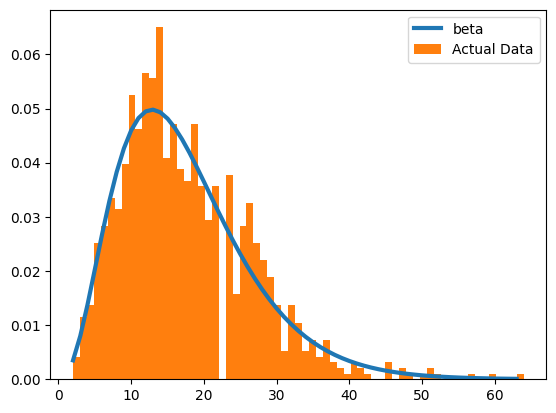

S7
DescribeResult(nobs=1000, minmax=(1, 52), mean=16.597, variance=56.507098098098105, skewness=0.6387071842717685, kurtosis=0.7209624205805527)
p value for norm = 0.0006476265324365987
p value for lognorm = 0.07436489277442038
p value for alpha = 1.5606518937137128e-43
p value for gamma = 0.042349980344897564
p value for beta = 0.04234856414926269
p value for expon = 8.965350432781229e-60
p value for exponnorm = 0.040236093260818784
p value for f = 0.044139406543671655
p value for erlang = 0.042347778422156535


/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 9.450000000000001.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.549999999999999.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.7.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 8.925.
  warnings.warn(
/Users/tsv/Work/grains/.venv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:3100: Runti

p value for t = 0.0037995365212884456
p value for weibull_min = 0.0
p value for weibull_max = 0.06278573274607013
Best fitting distribution: lognorm
Best p value: 0.07436489277442038
Parameters for the best fit: (0.23300190414758873, -15.397693782681063, 31.14020486151303)


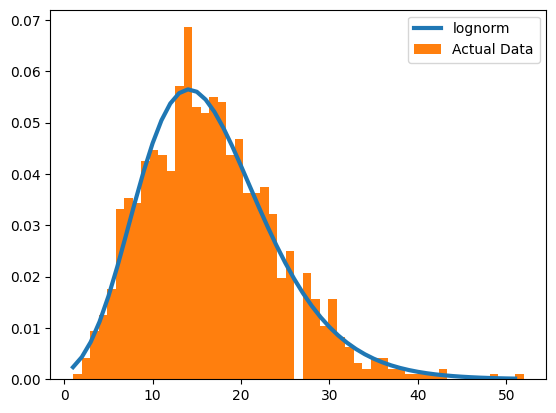

In [7]:
for column in df.columns[0:]:
    print(column)
    data = df[column].tolist()
    print(st.describe(data))
    best_dist, best_p, best_params = get_best_distribution(data)
    show_best_fit(data, best_dist, best_params)
    